In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#prep
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer

#models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#validation libraries
#from sklearn.cross_validation import KFold, StratifiedKFold
from sklearn.model_selection import KFold, StratifiedKFold
from IPython.display import display
from sklearn import metrics

from motionchart.motionchart import MotionChart, MotionChartDemo

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<a id='section1'></a>

# **1. Load Data**

So in this kernel, I have 3 datasets to analyze the relationship between Price Index House, Population and Unemployement Rate in Australian states. 

I also have 1 dataset manual mapping that I have made for key join one to another datashet

In [2]:
index_df = pd.read_csv('../Dataset Briston/House Price Index.csv')
pop_df = pd.read_csv('../ERP_by state and gender.csv')
mapping = pd.read_excel('../mapping_dataset.xlsx')
unemp_df = pd.read_excel('../SA4 Time Series - October 2016.xlsx','Time Series')

<a id='section2'></a>

# **2. Data Wrangling**

Change the format dataframe from column into row

### 2A. House Price Index

In [3]:
index_df.head()

,Unnamed: 0,Residential Property Price Index ; Sydney ;,Residential Property Price Index ; Melbourne ;,Residential Property Price Index ; Brisbane ;,Residential Property Price Index ; Adelaide ;,Residential Property Price Index ; Perth ;,Residential Property Price Index ; Hobart ;,Residential Property Price Index ; Darwin ;,Residential Property Price Index ; Canberra ;
0,01-Dec-05,81.8,64.0,75.0,71.6,70.0,79.1,60.2,71.7
1,01-Mar-06,80.8,65.4,75.6,72.2,75.6,81.0,63.2,72.5
2,01-Jun-06,82.3,67.2,77.5,73.4,86.4,83.4,67.1,74.3
3,01-Sep-06,82.0,68.1,78.5,73.8,95.1,84.6,67.3,76.0
4,01-Dec-06,82.7,69.5,80.5,75.7,98.4,86.1,70.5,77.1


In [4]:
index_df.columns

Index(['Unnamed: 0', 'Residential Property Price Index ;  Sydney ;',
       'Residential Property Price Index ;  Melbourne ;',
       'Residential Property Price Index ;  Brisbane ;',
       'Residential Property Price Index ;  Adelaide ;',
       'Residential Property Price Index ;  Perth ;',
       'Residential Property Price Index ;  Hobart ;',
       'Residential Property Price Index ;  Darwin ;',
       'Residential Property Price Index ;  Canberra ;'],
      dtype='object')

In [5]:
index_df.columns

Index(['Unnamed: 0', 'Residential Property Price Index ;  Sydney ;',
       'Residential Property Price Index ;  Melbourne ;',
       'Residential Property Price Index ;  Brisbane ;',
       'Residential Property Price Index ;  Adelaide ;',
       'Residential Property Price Index ;  Perth ;',
       'Residential Property Price Index ;  Hobart ;',
       'Residential Property Price Index ;  Darwin ;',
       'Residential Property Price Index ;  Canberra ;'],
      dtype='object')

In [6]:
a = "Residential Property Price Index ;  Melbourne ;"
a_split = a.split(';')[1].strip()
a_split

'Melbourne'

#### Transpose the data first

In [7]:
index_df.head(5)

,Unnamed: 0,Residential Property Price Index ; Sydney ;,Residential Property Price Index ; Melbourne ;,Residential Property Price Index ; Brisbane ;,Residential Property Price Index ; Adelaide ;,Residential Property Price Index ; Perth ;,Residential Property Price Index ; Hobart ;,Residential Property Price Index ; Darwin ;,Residential Property Price Index ; Canberra ;
0,01-Dec-05,81.8,64.0,75.0,71.6,70.0,79.1,60.2,71.7
1,01-Mar-06,80.8,65.4,75.6,72.2,75.6,81.0,63.2,72.5
2,01-Jun-06,82.3,67.2,77.5,73.4,86.4,83.4,67.1,74.3
3,01-Sep-06,82.0,68.1,78.5,73.8,95.1,84.6,67.3,76.0
4,01-Dec-06,82.7,69.5,80.5,75.7,98.4,86.1,70.5,77.1


In [8]:
index_df = index_df.melt(['Unnamed: 0'], var_name='Location', value_name='Value')


In [9]:
index_df['Location'] = index_df['Location'].str.split(';', expand = True)[1].str.strip()

In [10]:
index_df.head(5)

,Unnamed: 0,Location,Value
0,01-Dec-05,Sydney,81.8
1,01-Mar-06,Sydney,80.8
2,01-Jun-06,Sydney,82.3
3,01-Sep-06,Sydney,82.0
4,01-Dec-06,Sydney,82.7


In [11]:
index_df.columns

Index(['Unnamed: 0', 'Location', 'Value'], dtype='object')

In [12]:
index_df.columns = ['Date', 'Capital City', 'Index']

In [13]:
index_df.columns

Index(['Date', 'Capital City', 'Index'], dtype='object')

#### Convert date

In [14]:
index_df['Date'] = pd.to_datetime(index_df['Date']).dt.strftime('%Y-%m-%d')

In [15]:
index_df['Capital City']

0        Sydney
1        Sydney
2        Sydney
3        Sydney
4        Sydney
         ...   
307    Canberra
308    Canberra
309    Canberra
310    Canberra
311    Canberra
Name: Capital City, Length: 312, dtype: object

In [16]:
index_df.head(5)

,Date,Capital City,Index
0,2005-12-01,Sydney,81.8
1,2006-03-01,Sydney,80.8
2,2006-06-01,Sydney,82.3
3,2006-09-01,Sydney,82.0
4,2006-12-01,Sydney,82.7


In [17]:
index_df[index_df['Date'].isnull()].head(10)

,Date,Capital City,Index


In [18]:
index_df['Date'] = index_df['Date'].astype('datetime64')

In [19]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          312 non-null    datetime64[ns]
 1   Capital City  312 non-null    object        
 2   Index         312 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 7.4+ KB


### 2B. Population

In [20]:
pop_df = pd.read_csv('C:/Users/user/Jorvan - Learning Python/Folder Python Laptop Kantor/Dataset Briston/ERP_by state and gender.csv')

In [21]:
pop_df[pop_df['Unnamed: 0'].isnull()].head(10)

,Unnamed: 0,Estimated Resident Population ; Male ; New South Wales ;,Estimated Resident Population ; Male ; Victoria ;,Estimated Resident Population ; Male ; Queensland ;,Estimated Resident Population ; Male ; South Australia ;,Estimated Resident Population ; Male ; Western Australia ;,Estimated Resident Population ; Male ; Tasmania ;,Estimated Resident Population ; Male ; Northern Territory ;,Estimated Resident Population ; Male ; Australian Capital Territory ;,Estimated Resident Population ; Male ; Australia ;,...,Estimated Resident Population ; Female ; Australia ;,Estimated Resident Population ; Persons ; New South Wales ;,Estimated Resident Population ; Persons ; Victoria ;,Estimated Resident Population ; Persons ; Queensland ;,Estimated Resident Population ; Persons ; South Australia ;,Estimated Resident Population ; Persons ; Western Australia ;,Estimated Resident Population ; Persons ; Tasmania ;,Estimated Resident Population ; Persons ; Northern Territory ;,Estimated Resident Population ; Persons ; Australian Capital Territory ;,Estimated Resident Population ; Persons ; Australia ;


In [22]:
pop_df.head(5)

,Unnamed: 0,Estimated Resident Population ; Male ; New South Wales ;,Estimated Resident Population ; Male ; Victoria ;,Estimated Resident Population ; Male ; Queensland ;,Estimated Resident Population ; Male ; South Australia ;,Estimated Resident Population ; Male ; Western Australia ;,Estimated Resident Population ; Male ; Tasmania ;,Estimated Resident Population ; Male ; Northern Territory ;,Estimated Resident Population ; Male ; Australian Capital Territory ;,Estimated Resident Population ; Male ; Australia ;,...,Estimated Resident Population ; Female ; Australia ;,Estimated Resident Population ; Persons ; New South Wales ;,Estimated Resident Population ; Persons ; Victoria ;,Estimated Resident Population ; Persons ; Queensland ;,Estimated Resident Population ; Persons ; South Australia ;,Estimated Resident Population ; Persons ; Western Australia ;,Estimated Resident Population ; Persons ; Tasmania ;,Estimated Resident Population ; Persons ; Northern Territory ;,Estimated Resident Population ; Persons ; Australian Capital Territory ;,Estimated Resident Population ; Persons ; Australia ;
0,01-Dec-05,3327461,2481962,1977783,762665,1022918,240625,107839,164850,10087382,...,10224161,6718023,5023203,3964175,1544852,2029936,488098,207385,333505,20311543
1,01-Mar-06,3336005,2495951,1989764,765272,1030021,241193,108137,165351,10132982,...,10265150,6735528,5048207,3987653,1550135,2042450,489140,208347,334299,20398132
2,01-Jun-06,3339035,2502687,1999858,766432,1034567,241227,108502,165814,10159424,...,10291542,6742690,5061266,4007992,1552529,2050581,489302,209057,335170,20450966
3,01-Sep-06,3351254,2514544,2011909,768884,1040869,241864,109220,166549,10206440,...,10335842,6766133,5083593,4031580,1557332,2064032,490354,210284,336547,20542282
4,01-Dec-06,3361292,2524859,2023921,770847,1047061,242549,109586,167405,10248923,...,10378624,6786160,5103965,4055845,1561300,2076867,491515,211029,338381,20627547


In [23]:
pop_df = pop_df.melt(['Unnamed: 0'], var_name = 'Location', value_name = 'Value')

In [24]:
pop_df.head(5)

,Unnamed: 0,Location,Value
0,01-Dec-05,Estimated Resident Population ; Male ; New S...,3327461
1,01-Mar-06,Estimated Resident Population ; Male ; New S...,3336005
2,01-Jun-06,Estimated Resident Population ; Male ; New S...,3339035
3,01-Sep-06,Estimated Resident Population ; Male ; New S...,3351254
4,01-Dec-06,Estimated Resident Population ; Male ; New S...,3361292


In [25]:
pop_df['Genre'] = pop_df['Location'].str.split(';', expand = True)[1].str.strip()

In [26]:
pop_df['Location'] = pop_df['Location'].str.split(';', expand = True)[2].str.strip()

In [27]:
pop_df.columns = ['Date', 'State', 'Population','Genre']

In [28]:
pop_df.head(5)

,Date,State,Population,Genre
0,01-Dec-05,New South Wales,3327461,Male
1,01-Mar-06,New South Wales,3336005,Male
2,01-Jun-06,New South Wales,3339035,Male
3,01-Sep-06,New South Wales,3351254,Male
4,01-Dec-06,New South Wales,3361292,Male


In [29]:
pd.to_datetime(index_df['Date']).dt.strftime('%Y-%m-%d')

0      2005-12-01
1      2006-03-01
2      2006-06-01
3      2006-09-01
4      2006-12-01
          ...    
307    2014-06-01
308    2014-09-01
309    2014-12-01
310    2015-03-01
311    2015-06-01
Name: Date, Length: 312, dtype: object

In [30]:
pop_df['Date'] = pop_df['Date'].str[:-2]+'20'+pop_df['Date'].str[-2:]

In [31]:
pop_df['Date']

0       01-Dec-2005
1       01-Mar-2006
2       01-Jun-2006
3       01-Sep-2006
4       01-Dec-2006
           ...     
1048    01-Jun-2014
1049    01-Sep-2014
1050    01-Dec-2014
1051    01-Mar-2015
1052    01-Jun-2015
Name: Date, Length: 1053, dtype: object

In [32]:
pop_df['Date'] = pd.to_datetime(pop_df['Date'])

In [33]:
pop_df['Date']

0      2005-12-01
1      2006-03-01
2      2006-06-01
3      2006-09-01
4      2006-12-01
          ...    
1048   2014-06-01
1049   2014-09-01
1050   2014-12-01
1051   2015-03-01
1052   2015-06-01
Name: Date, Length: 1053, dtype: datetime64[ns]

In [34]:
pop_df[pop_df['Date'].isnull()].head(10)

,Date,State,Population,Genre


In [35]:
pop_df.head(5)

,Date,State,Population,Genre
0,2005-12-01,New South Wales,3327461,Male
1,2006-03-01,New South Wales,3336005,Male
2,2006-06-01,New South Wales,3339035,Male
3,2006-09-01,New South Wales,3351254,Male
4,2006-12-01,New South Wales,3361292,Male


In [36]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1053 non-null   datetime64[ns]
 1   State       1053 non-null   object        
 2   Population  1053 non-null   int64         
 3   Genre       1053 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 33.0+ KB


### 2C. Unemployment Rate

In [37]:
unemp_df.head()

,State/Territory,Date,Employment Rate (15-64),Unemployment Rate (15+),Participation Rate (15+)
0,NSW,1978-02-01,NaN,6.773762,60.735313
1,NSW,1978-03-01,NaN,6.490161,59.851078
2,NSW,1978-04-01,63.719468,6.507978,60.168513
3,NSW,1978-05-01,63.682010,6.115171,60.003564
4,NSW,1978-06-01,63.682900,6.424127,60.145380


There are nothing to be done in Unemployment dataset

<a id='section1'></a>

# **3. Join**

Combine population and price index dataset

In [38]:
pop_df.head(1000)

,Date,State,Population,Genre
0,2005-12-01,New South Wales,3327461,Male
1,2006-03-01,New South Wales,3336005,Male
2,2006-06-01,New South Wales,3339035,Male
3,2006-09-01,New South Wales,3351254,Male
4,2006-12-01,New South Wales,3361292,Male
...,...,...,...,...
995,2010-12-01,Australian Capital Territory,364833,Persons
996,2011-03-01,Australian Capital Territory,366737,Persons
997,2011-06-01,Australian Capital Territory,367985,Persons
998,2011-09-01,Australian Capital Territory,369397,Persons


In [39]:
index_df.head(2)

,Date,Capital City,Index
0,2005-12-01,Sydney,81.8
1,2006-03-01,Sydney,80.8


In [40]:
mapping.head(2)

,State,Capital City,Alias
0,New South Wales,Sydney,NSW
1,Victoria,Melbourne,VIC


In [41]:
## Join one DF
pop_df.join(mapping.set_index('State'), on='State')

,Date,State,Population,Genre,Capital City,Alias
0,2005-12-01,New South Wales,3327461,Male,Sydney,NSW
1,2006-03-01,New South Wales,3336005,Male,Sydney,NSW
2,2006-06-01,New South Wales,3339035,Male,Sydney,NSW
3,2006-09-01,New South Wales,3351254,Male,Sydney,NSW
4,2006-12-01,New South Wales,3361292,Male,Sydney,NSW
...,...,...,...,...,...,...
1048,2014-06-01,Australia,23464086,Persons,Canberra,ACT
1049,2014-09-01,Australia,23550288,Persons,Canberra,ACT
1050,2014-12-01,Australia,23614298,Persons,Canberra,ACT
1051,2015-03-01,Australia,23708240,Persons,Canberra,ACT


In [42]:
## Join multiple DF
merge1_df = pop_df.merge(mapping,on='State')

In [43]:
merge1_df.head()

,Date,State,Population,Genre,Capital City,Alias
0,2005-12-01,New South Wales,3327461,Male,Sydney,NSW
1,2006-03-01,New South Wales,3336005,Male,Sydney,NSW
2,2006-06-01,New South Wales,3339035,Male,Sydney,NSW
3,2006-09-01,New South Wales,3351254,Male,Sydney,NSW
4,2006-12-01,New South Wales,3361292,Male,Sydney,NSW


In [44]:
final_df = pd.merge(merge1_df,index_df, how= 'left',left_on =['Date', 'Capital City'], right_on = ['Date', 'Capital City'])

In [45]:
final_df.head()

,Date,State,Population,Genre,Capital City,Alias,Index
0,2005-12-01,New South Wales,3327461,Male,Sydney,NSW,81.8
1,2006-03-01,New South Wales,3336005,Male,Sydney,NSW,80.8
2,2006-06-01,New South Wales,3339035,Male,Sydney,NSW,82.3
3,2006-09-01,New South Wales,3351254,Male,Sydney,NSW,82.0
4,2006-12-01,New South Wales,3361292,Male,Sydney,NSW,82.7


<a id='section4'></a>

# **4. Aggregation**

Need to do aggregation before combine the Population - Index dataframe with Unemployement Rate Dataset

In [46]:
## Find data
final_df.loc[(final_df['State'] == 'New South Wales') & (final_df['Date']=='2005-12-01')]

,Date,State,Population,Genre,Capital City,Alias,Index
0,2005-12-01,New South Wales,3327461,Male,Sydney,NSW,81.8
39,2005-12-01,New South Wales,3390562,Female,Sydney,NSW,81.8
78,2005-12-01,New South Wales,6718023,Persons,Sydney,NSW,81.8


In [47]:
#SUM the population
temp_final1 = final_df.groupby(['Date','State','Capital City'])['Population'].sum()

#Max the price index because the type of data like master price index each state
temp_final2 = final_df.groupby(['Date','State','Capital City'])['Index'].max()
final_agg_df = pd.merge(temp_final1, temp_final2, left_index = True, right_index = True).reset_index()

In [48]:
final_agg_df.head()

,Date,State,Capital City,Population,Index
0,2005-12-01,Australia,Canberra,40623086,71.7
1,2005-12-01,Australian Capital Territory,Canberra,667010,71.7
2,2005-12-01,New South Wales,Sydney,13436046,81.8
3,2005-12-01,Queensland,Brisbane,7928350,75.0
4,2005-12-01,South Australia,Adelaide,3089704,71.6


<a id='section5'></a>

# **5. Join Unemployment Rate Dataset**

Combine Population - Index Dataframe with Unemployment Rate Dataset

In [49]:
final_agg_df.head()

,Date,State,Capital City,Population,Index
0,2005-12-01,Australia,Canberra,40623086,71.7
1,2005-12-01,Australian Capital Territory,Canberra,667010,71.7
2,2005-12-01,New South Wales,Sydney,13436046,81.8
3,2005-12-01,Queensland,Brisbane,7928350,75.0
4,2005-12-01,South Australia,Adelaide,3089704,71.6


In [50]:
unemp_df.head()

,State/Territory,Date,Employment Rate (15-64),Unemployment Rate (15+),Participation Rate (15+)
0,NSW,1978-02-01,NaN,6.773762,60.735313
1,NSW,1978-03-01,NaN,6.490161,59.851078
2,NSW,1978-04-01,63.719468,6.507978,60.168513
3,NSW,1978-05-01,63.682010,6.115171,60.003564
4,NSW,1978-06-01,63.682900,6.424127,60.145380


In [51]:
mapping.head()

,State,Capital City,Alias
0,New South Wales,Sydney,NSW
1,Victoria,Melbourne,VIC
2,Queensland,Brisbane,QLD
3,South Australia,Adelaide,SA
4,Western Australia,Perth,WA


In [52]:
merge_6 = pd.merge(final_agg_df,mapping, how= 'left',left_on =['State', 'Capital City'], right_on = ['State','Capital City'])

In [53]:
merge_6.head()

,Date,State,Capital City,Population,Index,Alias
0,2005-12-01,Australia,Canberra,40623086,71.7,ACT
1,2005-12-01,Australian Capital Territory,Canberra,667010,71.7,ACT
2,2005-12-01,New South Wales,Sydney,13436046,81.8,NSW
3,2005-12-01,Queensland,Brisbane,7928350,75.0,QLD
4,2005-12-01,South Australia,Adelaide,3089704,71.6,SA


In [54]:
final_agg_df = pd.merge(merge_6, unemp_df, how = 'left',left_on =['Alias', 'Date'], right_on = ['State/Territory', 'Date'])

#### Need to change Date format from datetime to str for chart needs

In [55]:
final_agg_df['Date'] = final_agg_df['Date'].astype(str)

In [56]:
final_agg_df.head()

,Date,State,Capital City,Population,Index,Alias,State/Territory,Employment Rate (15-64),Unemployment Rate (15+),Participation Rate (15+)
0,2005-12-01,Australia,Canberra,40623086,71.7,ACT,ACT,78.393068,3.422536,72.006718
1,2005-12-01,Australian Capital Territory,Canberra,667010,71.7,ACT,ACT,78.393068,3.422536,72.006718
2,2005-12-01,New South Wales,Sydney,13436046,81.8,NSW,NSW,70.481740,5.293757,63.106123
3,2005-12-01,Queensland,Brisbane,7928350,75.0,QLD,QLD,73.205813,4.863610,66.092553
4,2005-12-01,South Australia,Adelaide,3089704,71.6,SA,SA,71.345997,4.868181,61.820680


In [58]:
final_agg_df['Year'] = final_agg_df['Date'].str[0:4]

In [59]:
final_agg_df.head()

,Date,State,Capital City,Population,Index,Alias,State/Territory,Employment Rate (15-64),Unemployment Rate (15+),Participation Rate (15+),Year
0,2005-12-01,Australia,Canberra,40623086,71.7,ACT,ACT,78.393068,3.422536,72.006718,2005
1,2005-12-01,Australian Capital Territory,Canberra,667010,71.7,ACT,ACT,78.393068,3.422536,72.006718,2005
2,2005-12-01,New South Wales,Sydney,13436046,81.8,NSW,NSW,70.481740,5.293757,63.106123,2005
3,2005-12-01,Queensland,Brisbane,7928350,75.0,QLD,QLD,73.205813,4.863610,66.092553,2005
4,2005-12-01,South Australia,Adelaide,3089704,71.6,SA,SA,71.345997,4.868181,61.820680,2005


<a id='section6'></a>

# **6. Analysing the Relationship**

### 6A. Check Distribution 

In [60]:
#metrics column
corrmat = final_agg_df.corr()

#### Histogram of the metrics

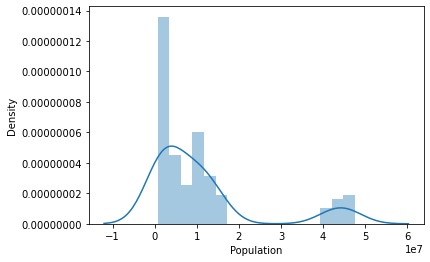

Skewness of Population: 1.803640
Kurtosis of Population: 2.031909


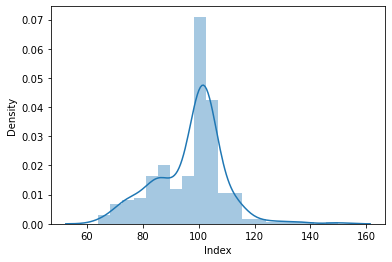

Skewness of Index: -0.103254
Kurtosis of Index: 1.312416


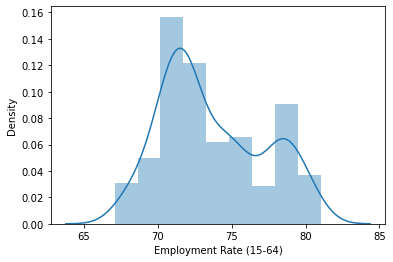

Skewness of Employment Rate (15-64): 0.411806
Kurtosis of Employment Rate (15-64): -0.910321


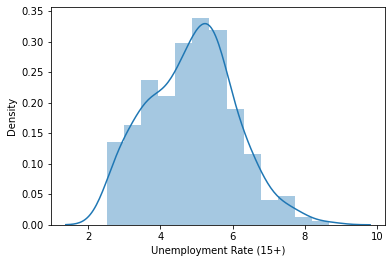

Skewness of Unemployment Rate (15+): 0.145954
Kurtosis of Unemployment Rate (15+): -0.268496


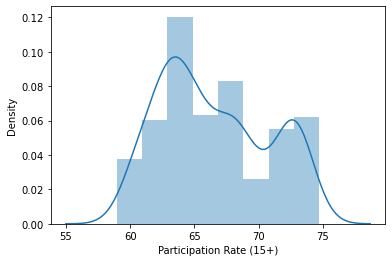

Skewness of Participation Rate (15+): 0.314926
Kurtosis of Participation Rate (15+): -1.126411


In [61]:
arr = ['Population', 'Index', 'Employment Rate (15-64)',
       'Unemployment Rate (15+)', 'Participation Rate (15+)']

for i in range(len(arr)):
    sns.distplot(final_agg_df[arr[i]]);
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()
    print("Skewness of %s: %f" % (arr[i], final_agg_df[arr[i]].skew()))
    print("Kurtosis of %s: %f" % (arr[i], final_agg_df[arr[i]].kurt()))

#### Relationship dimensions and metrics

In [68]:

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

To disable auto-scrolling, execute this javascript in a notebook cell before other cells are executed:
https://stackoverflow.com/questions/41641205/how-to-avoid-output-into-scrollable-frames-in-jupyter-notebook/41646557

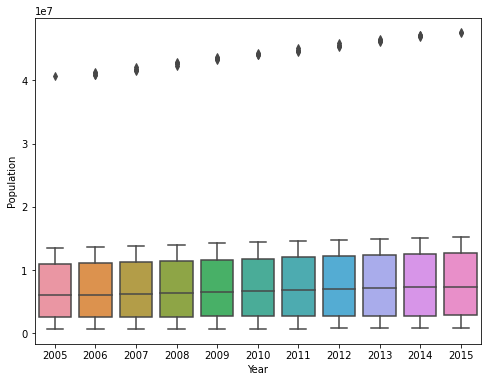

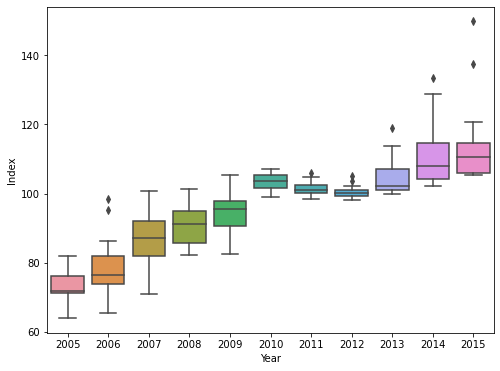

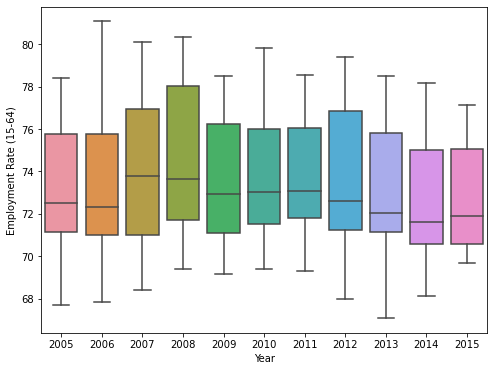

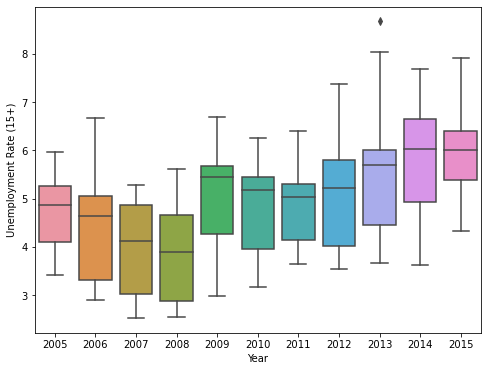

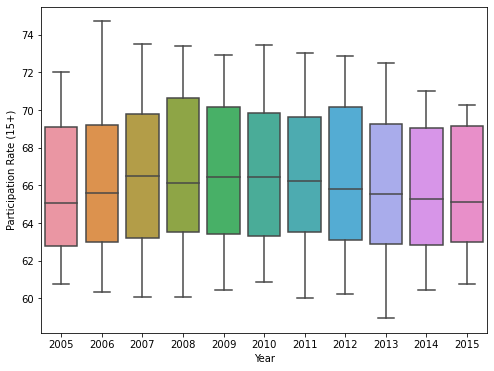

In [69]:
var = 'Year'

for i in range(len(arr)):
    data = pd.concat([final_agg_df[arr[i]], final_agg_df[var]],axis = 1)
    f,ax = plt.subplots(figsize=(8,6))
    fig = sns.boxplot(x=var, y= arr[i],data = data)
    plt.show()



#### Correlation Metric

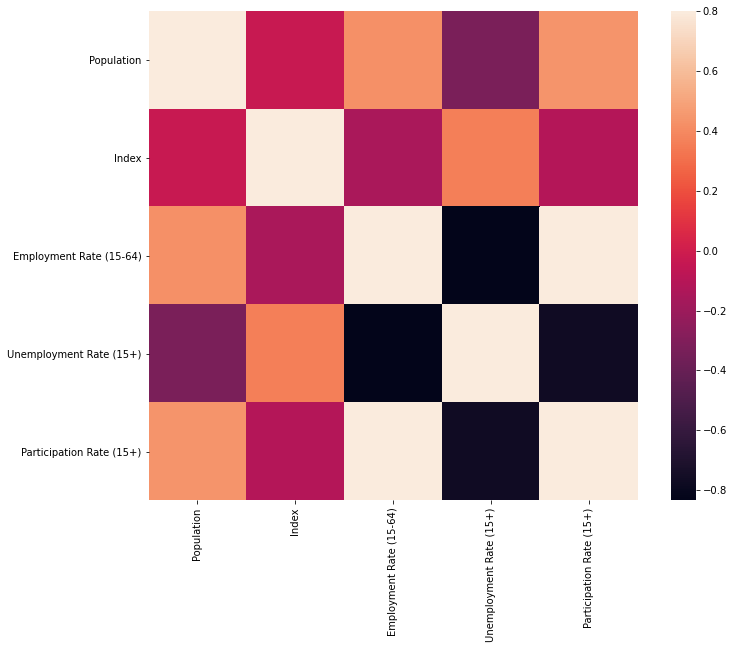

In [70]:
#correlation matrix
corrmat = final_agg_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

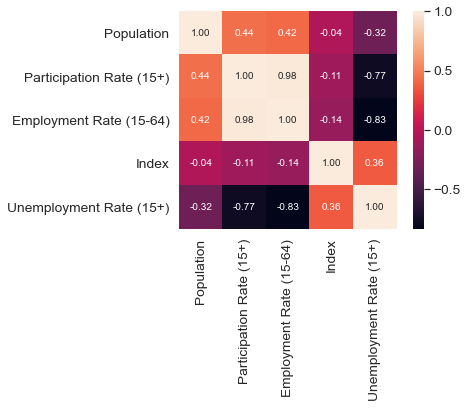

In [71]:
#Index correlation matrix
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Population')['Population'].index
cm = np.corrcoef(final_agg_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 6B.Relationship between the metrics (Focusing on Index and Unemployment Rate (15+))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Index', ylabel='Unemployment Rate (15+)'>

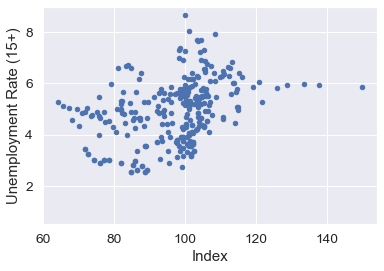

In [72]:
#scatter plot var Price Index
var = 'Index'
data = pd.concat([final_agg_df['Unemployment Rate (15+)'], final_agg_df[var]], axis=1)
data.plot.scatter(x=var, y='Unemployment Rate (15+)', ylim=(0.50000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Unemployment Rate (15+)', ylabel='Index'>

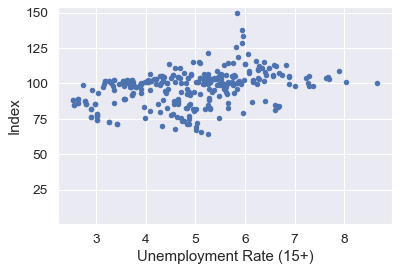

In [73]:
#scatter plot var Unemployment Rate (15+)
var = 'Unemployment Rate (15+)'
data = pd.concat([final_agg_df['Index'], final_agg_df[var]], axis=1)
data.plot.scatter(x=var, y='Index', ylim=(0.50000))

<b>Preparation Chart House Price Index & Unemployment Rate DF</b>

In [79]:
hpi_ur_df = final_agg_df.groupby(['Year', 'State'])['Index','Unemployment Rate (15+)'].mean().reset_index()

In [80]:
hpi_ur_df.head(10)

,Year,State,Index,Unemployment Rate (15+)
0,2005,Australia,71.700,3.422536
1,2005,Australian Capital Territory,71.700,3.422536
2,2005,New South Wales,81.800,5.293757
3,2005,Queensland,75.000,4.863610
4,2005,South Australia,71.600,4.868181
5,2005,Tasmania,79.100,5.962563
6,2005,Victoria,64.000,5.260037
7,2005,Western Australia,70.000,4.326411
8,2006,Australia,74.975,3.043238
9,2006,Australian Capital Territory,74.975,3.043238


In [81]:
hpi_ur_df[hpi_ur_df['State'] == 'Tasmania']

,Year,State,Index,Unemployment Rate (15+)
5,2005,Tasmania,79.100,5.962563
13,2006,Tasmania,83.775,6.384176
21,2007,Tasmania,91.600,5.229338
29,2008,Tasmania,94.075,4.417431
37,2009,Tasmania,98.150,5.013183
45,2010,Tasmania,104.900,5.581793
53,2011,Tasmania,102.825,5.474581
61,2012,Tasmania,98.525,7.137489
69,2013,Tasmania,101.075,7.917654
77,2014,Tasmania,104.350,7.276178


In [82]:
hpi_df = hpi_ur_df.pivot(index='Year', columns='State', values=['Index']).reset_index()
ur_df = hpi_ur_df.pivot(index='Year', columns='State', values=['Unemployment Rate (15+)']).reset_index()

In [83]:
#del hpi_df
#del ur_df

<b>Need to remove the Unemployment Rate and Index Column Name </b>

In [84]:
#https://stackoverflow.com/questions/57661237/how-can-remove-a-column-name-label-from-a-pivot-table-and-remaining-column-names

#https://stackoverflow.com/questions/14507794/pandas-how-to-flatten-a-hierarchical-index-in-columns

# hpi_df

# replace the bottom column with year 
hpi_df = hpi_df.rename(columns={"":"Year"})

#get column bottom
hpi_df.columns = hpi_df.columns.get_level_values(1)


In [85]:
# ur_df

# replace the bottom column with year 
ur_df = ur_df.rename(columns={"":"Year"})

#get column bottom
ur_df.columns = hpi_df.columns.get_level_values(0)


In [86]:
hpi_df.head(5)

State,Year,Australia,Australian Capital Territory,New South Wales,Queensland,South Australia,Tasmania,Victoria,Western Australia
0,2005,71.700,71.700,81.800,75.000,71.600,79.100,64.000,70.000
1,2006,74.975,74.975,81.950,78.025,73.775,83.775,67.550,88.875
2,2007,83.875,83.875,85.900,91.025,84.475,91.600,77.800,99.175
3,2008,86.750,86.750,86.500,98.800,94.100,94.075,84.125,96.325
4,2009,91.050,91.050,89.625,100.550,96.825,98.150,90.125,97.175


In [87]:
ur_df.head(5)

State,Year,Australia,Australian Capital Territory,New South Wales,Queensland,South Australia,Tasmania,Victoria,Western Australia
0,2005,3.422536,3.422536,5.293757,4.863610,4.868181,5.962563,5.260037,4.326411
1,2006,3.043238,3.043238,5.069919,4.458506,5.001567,6.384176,4.929269,3.507984
2,2007,2.766634,2.766634,4.708354,3.708394,4.857289,5.229338,4.652167,3.297241
3,2008,2.683098,2.683098,4.758239,3.740968,5.057074,4.417431,4.538744,3.053289
4,2009,3.509424,3.509424,6.104534,5.573159,5.556539,5.013183,5.717117,5.232996


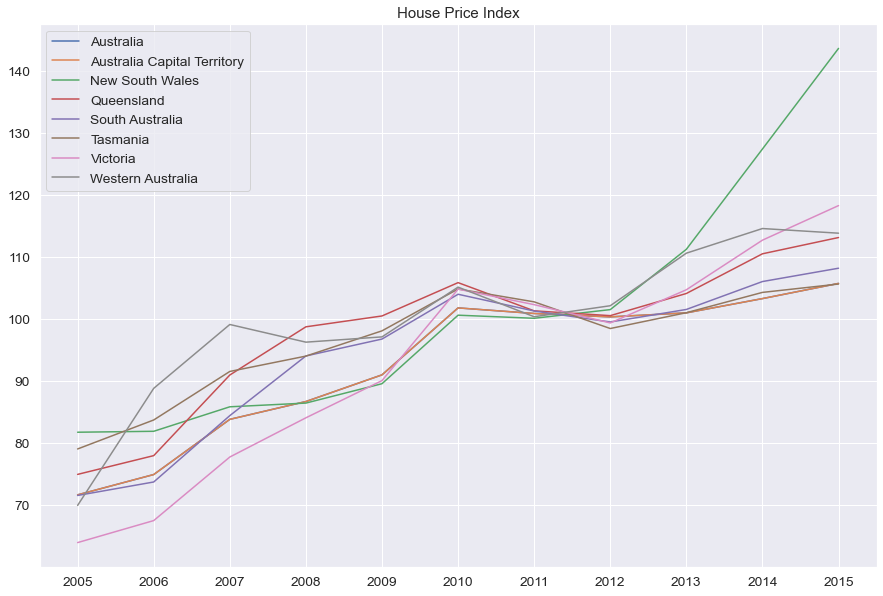

In [88]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

plt.title('House Price Index')
plt.plot(hpi_df['Year'],hpi_df['Australia'],label = 'Australia')
plt.plot(hpi_df['Year'],hpi_df['Australian Capital Territory'],label = 'Australia Capital Territory')
plt.plot(hpi_df['Year'],hpi_df['New South Wales'],label = 'New South Wales')
plt.plot(hpi_df['Year'],hpi_df['Queensland'],label = 'Queensland')
plt.plot(hpi_df['Year'],hpi_df['South Australia'],label = 'South Australia')
plt.plot(hpi_df['Year'],hpi_df['Tasmania'],label = 'Tasmania')
plt.plot(hpi_df['Year'],hpi_df['Victoria'],label = 'Victoria')
plt.plot(hpi_df['Year'],hpi_df['Western Australia'],label = 'Western Australia')

ax.legend()
plt.show()

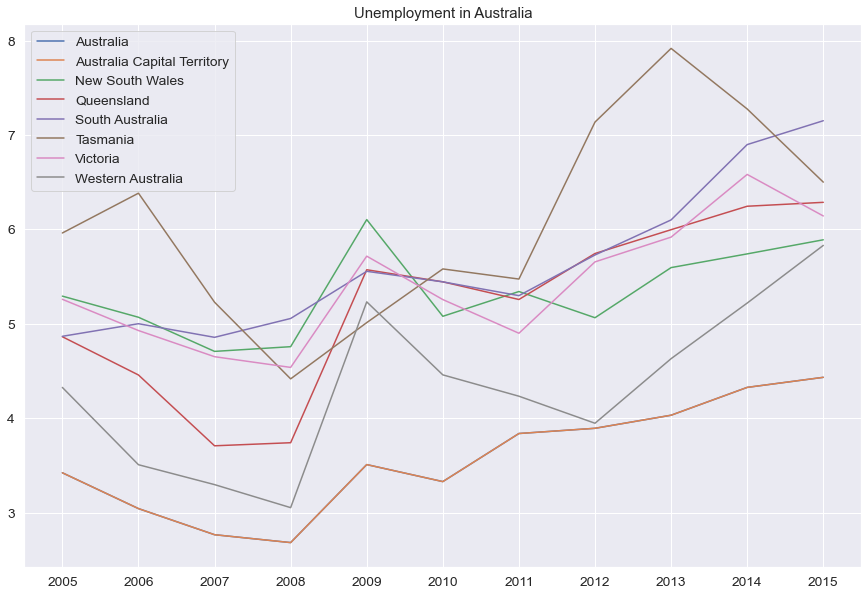

In [89]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

plt.title('Unemployment in Australia')
plt.plot(ur_df['Year'],ur_df['Australia'],label = 'Australia')
plt.plot(ur_df['Year'],ur_df['Australian Capital Territory'],label = 'Australia Capital Territory')
plt.plot(ur_df['Year'],ur_df['New South Wales'],label = 'New South Wales')
plt.plot(ur_df['Year'],ur_df['Queensland'],label = 'Queensland')
plt.plot(ur_df['Year'],ur_df['South Australia'],label = 'South Australia')
plt.plot(ur_df['Year'],ur_df['Tasmania'],label = 'Tasmania')
plt.plot(ur_df['Year'],ur_df['Victoria'],label = 'Victoria')
plt.plot(ur_df['Year'],ur_df['Western Australia'],label = 'Western Australia')

ax.legend()
plt.show()

<b>Relationship between Index and Unemployement Rate</b>

In [90]:
final_agg_df.head(10)

,Date,State,Capital City,Population,Index,Alias,State/Territory,Employment Rate (15-64),Unemployment Rate (15+),Participation Rate (15+),Year
0,2005-12-01,Australia,Canberra,40623086,71.7,ACT,ACT,78.393068,3.422536,72.006718,2005
1,2005-12-01,Australian Capital Territory,Canberra,667010,71.7,ACT,ACT,78.393068,3.422536,72.006718,2005
2,2005-12-01,New South Wales,Sydney,13436046,81.8,NSW,NSW,70.481740,5.293757,63.106123,2005
3,2005-12-01,Queensland,Brisbane,7928350,75.0,QLD,QLD,73.205813,4.863610,66.092553,2005
4,2005-12-01,South Australia,Adelaide,3089704,71.6,SA,SA,71.345997,4.868181,61.820680,2005
5,2005-12-01,Tasmania,Hobart,976196,79.1,TAS,TAS,67.694544,5.962563,60.743142,2005
6,2005-12-01,Victoria,Melbourne,10046406,64.0,VIC,VIC,71.806591,5.260037,64.045364,2005
7,2005-12-01,Western Australia,Perth,4059872,70.0,WA,WA,74.916775,4.326411,68.156198,2005
8,2006-03-01,Australia,Canberra,40796264,72.5,ACT,ACT,77.310830,3.254369,72.257139,2006
9,2006-03-01,Australian Capital Territory,Canberra,668598,72.5,ACT,ACT,77.310830,3.254369,72.257139,2006


In [91]:
rel_df = final_agg_df.groupby(['Year'])['Index','Unemployment Rate (15+)'].mean().reset_index()

In [92]:
rel_df.head(10)

,Year,Index,Unemployment Rate (15+)
0,2005,73.112500,4.677454
1,2006,77.987500,4.429737
2,2007,87.215625,3.998256
3,2008,90.928125,3.866493
4,2009,94.318750,5.027047
5,2010,103.665625,4.740899
6,2011,101.303125,4.773150
7,2012,100.337500,5.133570
8,2013,104.462500,5.528334
9,2014,110.328125,5.827400


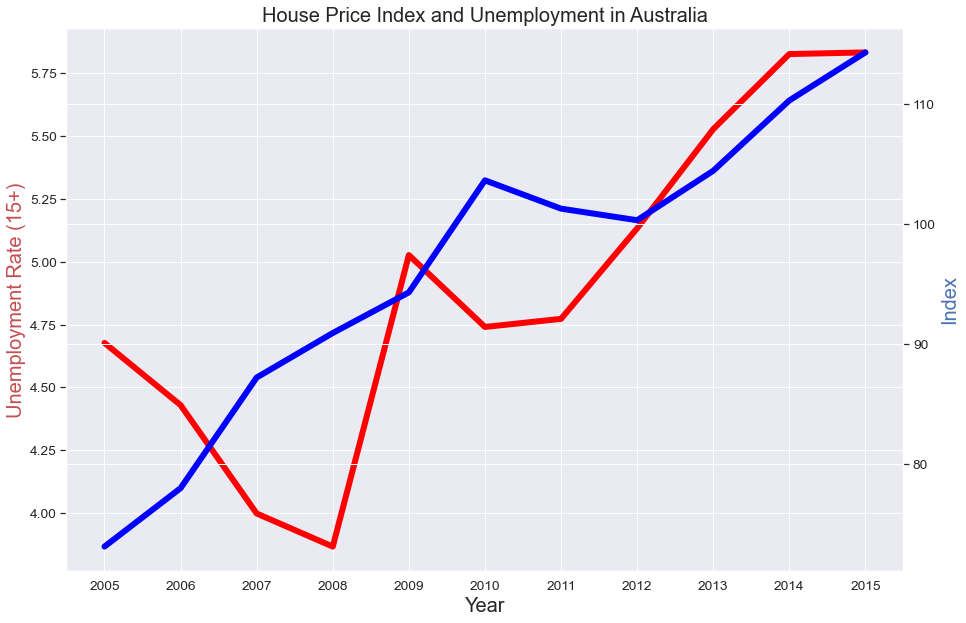

In [93]:
# Plot House Price Rate - Unemployment Rate

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(rel_df['Year'], rel_df['Unemployment Rate (15+)'], linewidth=6, linestyle="-", c="red")
ax2.plot(rel_df['Year'], rel_df['Index'], linewidth=6, linestyle="-", c="blue")

ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Unemployment Rate (15+)',fontsize=20,color='r')
ax2.set_ylabel('Index', fontsize=20,color='b')

plt.title('House Price Index and Unemployment in Australia',fontsize=20)
ax1.grid(True, which='both')
ax2.grid(True, which='both')
plt.show()